In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import TSNE
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('Iris.csv')
df.head()

Saving Iris.csv to Iris.csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


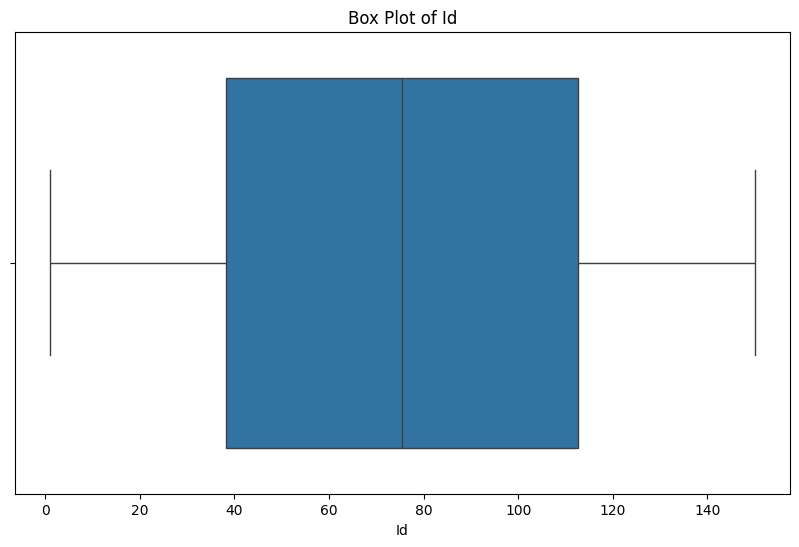

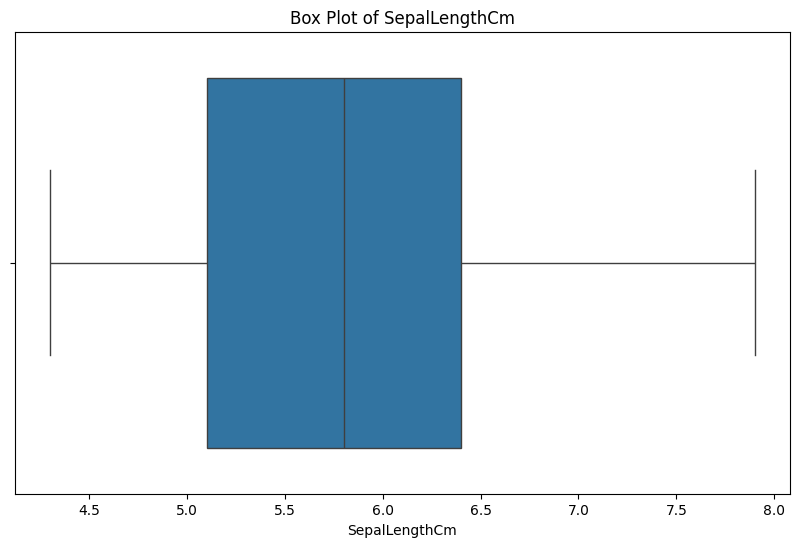

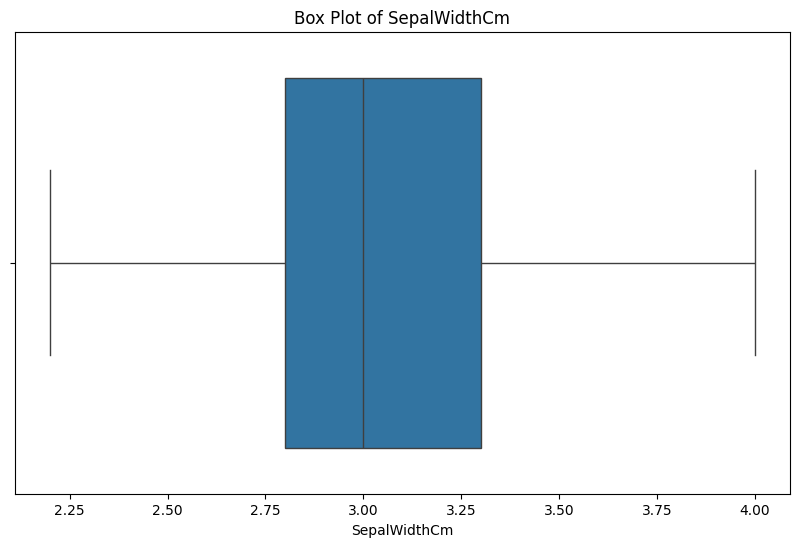

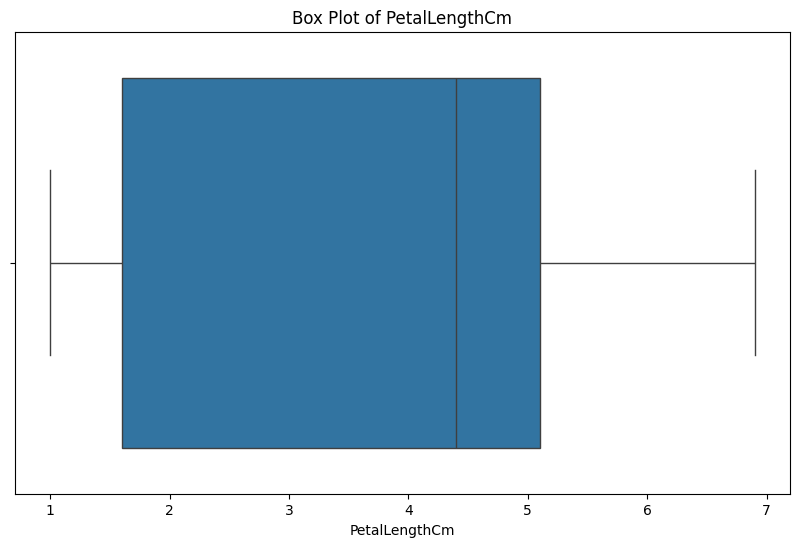

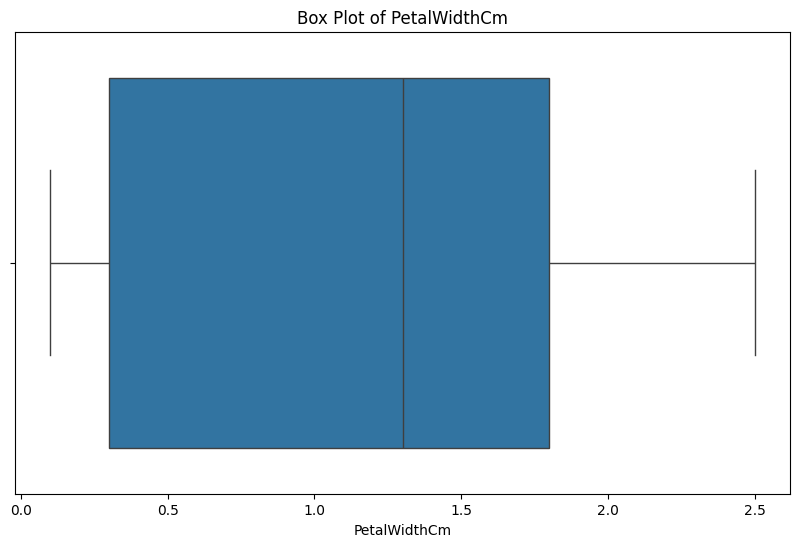

In [4]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df = remove_outliers(df, col)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [5]:
x = df.drop(['Id','Species'],axis = 1)
y = df['Species']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

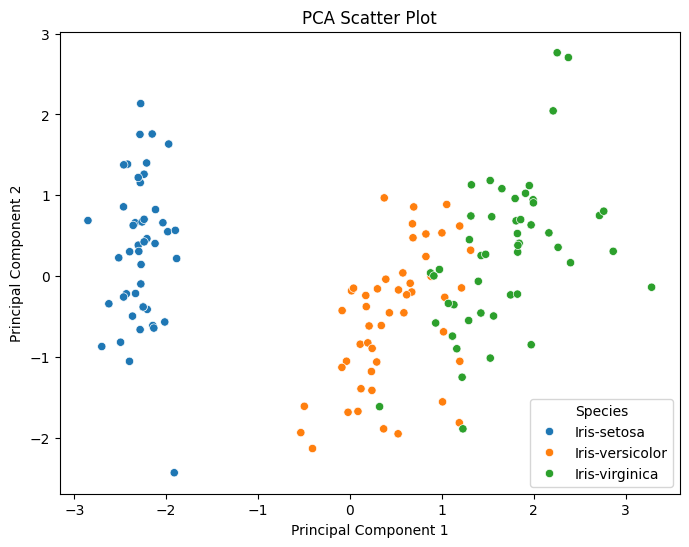

In [6]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

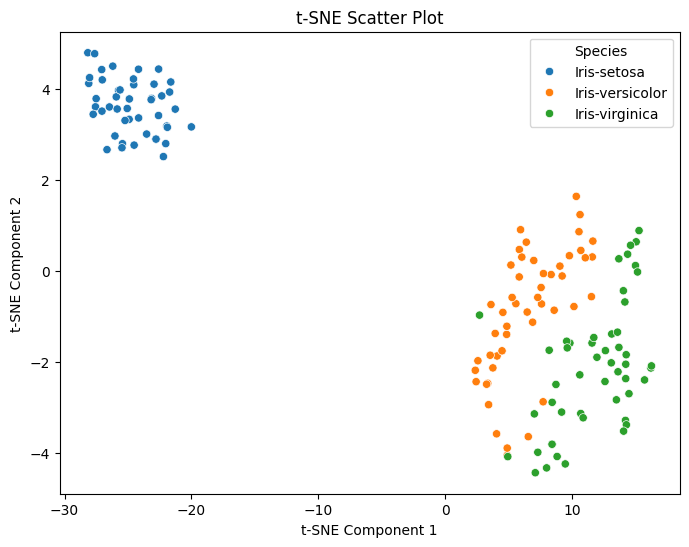

In [7]:
t_sne = TSNE(n_components = 2,random_state = 42)
x_tsne  = t_sne.fit_transform(x_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_tsne[:,0],y=x_tsne[:,1],hue=y)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot')
plt.show()

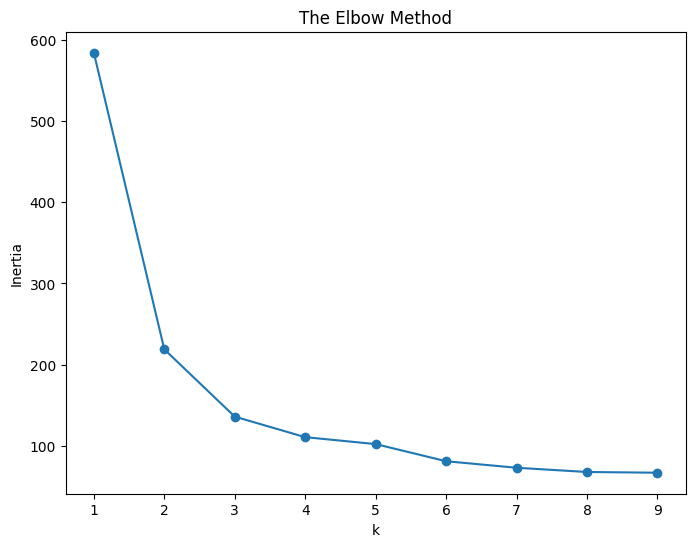

In [8]:
inertia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i,random_state = 42)
  kmeans.fit(x_scaled)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,10),inertia,marker = 'o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

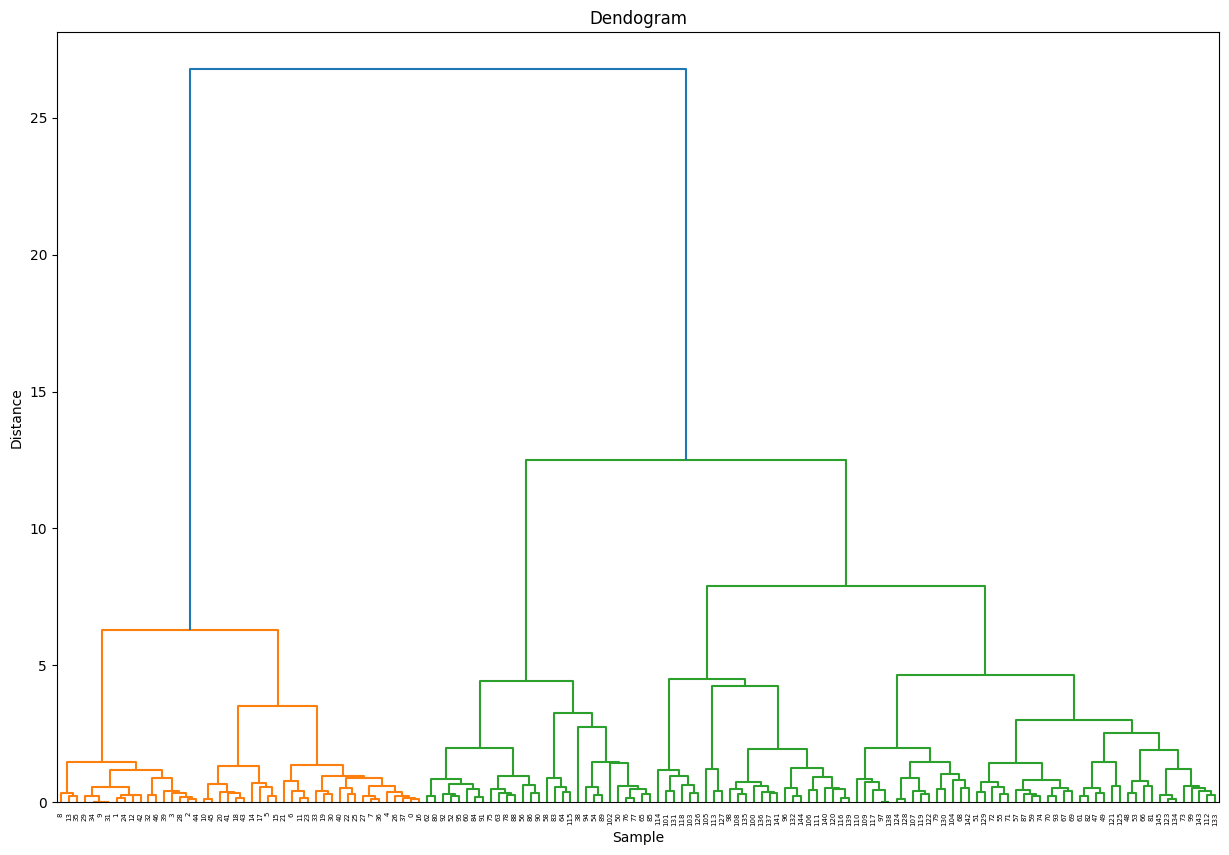

In [9]:
linkage_matrix = linkage(x_scaled,method='ward')
plt.figure(figsize=(15,10))
dendrogram(linkage_matrix)
plt.title('Dendogram')
plt.xlabel('Sample')
plt.ylabel('Distance')
plt.show()

PCA - Principal Component Analysis is used for dimensionality reduction ,high dimensional data is reduced to lower dimension .
t-SNE is an unsupervised technique,used for visualizing high dimension data in 2D or 3D

KMeans is fast and works well for partitioning data in k clusters as per the similarity.
For ex:Customers can be classified based on purchase,age etc..
Or they can be classified on their browsing history usually used by e-commerce platforms

Hierarchical clustering builds a tree-like structure or a dendrogram for representing the data hierarchy .
For ex: A group of genes or proteins can be grouped as a cluster with similar expression patterns which is commonly used in medical research and genomics